# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [265]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set()

In [266]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [267]:
hospital_read_df.head(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013


In [268]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [5]:
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

****
## Preliminary Analysis

In [269]:
# Select the part of dataset where the Number of Discharges is "Not Available"
NA_df = hospital_read_df[hospital_read_df['Number of Discharges'] == 'Not Available']
NA_df["Excess Readmission Ratio"].isnull().sum()

3048

In [271]:
NA_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,5282.000000,3048.000000,2234.000000,2234.000000,2234.000000,0.0
mean,276307.995456,2.796588,0.977254,11.421441,11.722023,NaN
std,171111.152565,1.989955,0.081908,6.712138,6.897330,NaN
min,10005.000000,1.000000,0.629900,2.900000,2.900000,NaN
25%,110233.250000,1.000000,0.937050,5.100000,5.200000,NaN
50%,270074.000000,1.000000,0.974600,7.200000,6.800000,NaN
75%,430039.750000,5.000000,1.016075,18.000000,18.600000,NaN
max,670091.000000,5.000000,1.328700,29.900000,29.400000,NaN


In [16]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/kkim14/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [315]:
clean_hospital_read_df.describe()

,Provider_Number,Number_of_Discharges,Footnote,Excess_Readmission_Ratio,Predicted_Readmission_Rate,Expected_Readmission_Rate,Number_of_Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [275]:
under100 = clean_hospital_read_df[clean_hospital_read_df.Number_of_Discharges<300][["Number_of_Discharges", "Excess_Readmission_Ratio"]]


In [276]:
clean_hospital_read_df.groupby("Number_of_Discharges").agg({"Excess_Readmission_Ratio": "sum"}).head()

,Excess_Readmission_Ratio
Number_of_Discharges,
0,0.0000
25,1.0914
27,1.0961
28,1.0934
29,1.0908


In [277]:
clean_hospital_read_df.Excess_Readmission_Ratio.isnull().sum()

81

In [278]:
clean_hospital_read_df.Number_of_Discharges.value_counts().sort_index()[:5]

0     81
25     1
27     1
28     1
29     1
Name: Number_of_Discharges, dtype: int64

In [279]:
clean_hospital_read_df.columns = clean_hospital_read_df.columns.str.replace(' ', '_')

In [286]:
under100 = clean_hospital_read_df[clean_hospital_read_df.Number_of_Discharges<100][["Number_of_Discharges", "Excess_Readmission_Ratio"]]
under100over1 = under100[under100.Number_of_Discharges !=0]

under100over1 = under100over1.set_index("Number_of_Discharges")

In [287]:
(under100over1[under100over1 >1].count())/under100over1.count()

Excess_Readmission_Ratio    0.632155
dtype: float64

In [288]:
under100over1.mean()

Excess_Readmission_Ratio    1.022618
dtype: float64

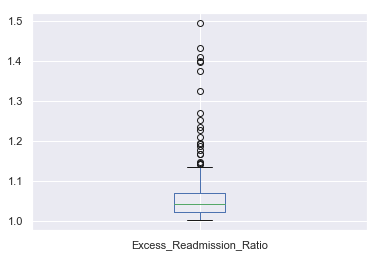

In [289]:
under100over1[under100over1 >1].boxplot()

/Users/kkim14/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


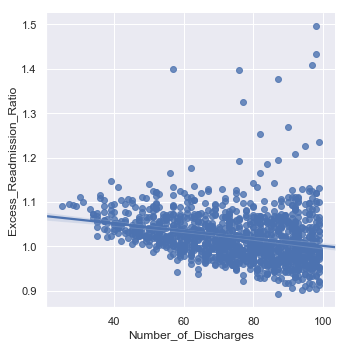

In [290]:
under100over1=under100over1.reset_index()
sns.lmplot("Number_of_Discharges", "Excess_Readmission_Ratio", under100over1)

In [292]:
over1000 = clean_hospital_read_df[clean_hospital_read_df.Number_of_Discharges>1000][["Number_of_Discharges", "Excess_Readmission_Ratio"]]
over1000=over1000.set_index("Number_of_Discharges")

In [293]:
over1000.mean()

Excess_Readmission_Ratio    0.978335
dtype: float64

In [294]:
(over1000[over1000 >1].count())/over1000.count()

Excess_Readmission_Ratio    0.444924
dtype: float64

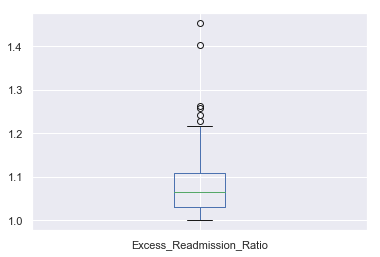

In [295]:
over1000[over1000 >1].boxplot()

/Users/kkim14/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(1000, 2500)

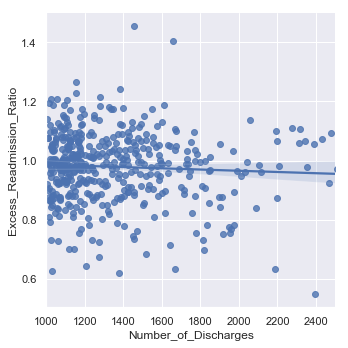

In [296]:
over1000=over1000.reset_index()
sns.lmplot("Number_of_Discharges", "Excess_Readmission_Ratio", over1000)
plt.xlim(1000, 2500)

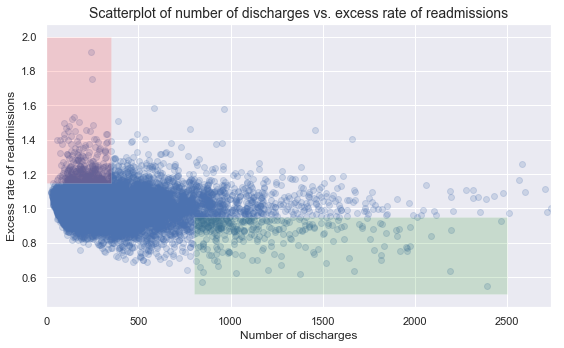

In [298]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number_of_Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess_Readmission_Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****


### ANSWERS: 

This dataset has total 16860 observations. It can be divided into two groups. 
* The first group is missing "Number of Discharges" information. There are 5282 observations in this group. 
* The rest does have "Number of Discharges" information. There are 11578 observaions in this group. 

The scatter plot given in the report plots "Number of Discharges" versus "Excess Readmission Rate". It naturally only uses the second group since the first group has null values for the Number of Discharges column. 

We note that approximately 40% of the first group (over 2000 rows) has non-null values in its "Excess Readmission Rate" column. Although the scatter plot implies that the rate of readmissions is trending down with increasing number of discharges, we should be careful to draw a conclusion because the plot does not include the entire "Excess Readmission Rate" data. 


* Null hypothesis: 
 under100over1 (facilities with number of discharges < 100) 
 has higher excess ratio than that of 
 over1000 (facilities with number of discharges > 1000)
 
* With the current mean difference 0.04%, we compute the 99% confidence interval and obtained (0.0245108, 0.06309301). Assuming the sample data is a good representative, this implies that there is indeed a difference in the excess readmiddion rate between small capacity facilities and large capacity facilities. 

Practically, merging hospital is not feasible. Constructing new buildings, merging databases, and many other factors need to be considered.

We point out that the report assumes that the number of discharges is positively correlated to the hospital capacity. This may or may not be true. Even if the correlation can be proven, there may also be other important factors than the number of discharges that contribute to the excess readmssion rate. 

In [257]:
under100over1.mean()-over1000.mean()

Number_of_Discharges       -1308.710474
Excess_Readmission_Ratio       0.044283
dtype: float64

In [226]:
# Define bootstrap functions:
def replicate(data, function):
    """Return replicate of a resampled data array."""
    
    # Create the resampled array and return the statistic of interest:
    return function(np.random.choice(data, size=len(data)))

In [258]:
def draw_replicates(data, function, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates:
    replicates = np.empty(size)

    # Generate replicates:
    for i in range(size):
        replicates[i] = replicate(data, function)

    return replicates

replicates_under100 = draw_replicates(under100over1.Excess_Readmission_Ratio, np.mean, 10000)
replicates_over1000 = draw_replicates(over1000.Excess_Readmission_Ratio, np.mean, 10000)

# Compute the 99.9% confidence interval:
CI = np.percentile(replicates_under100 - replicates_over1000, [0.05, 99.95])
print('99.9% Confidence Interval:', CI)

99.9% Confidence Interval: [0.0245108  0.06309301]


In [263]:
def draw_replicates(data, function, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates:
    replicates = np.empty(size)

    # Generate replicates:
    for i in range(size):
        replicates[i] = replicate(data, function)

    return replicates

replicates_under100 = draw_replicates(under100over1.Excess_Readmission_Ratio, np.mean, 10000)
replicates_over1000 = draw_replicates(over1000.Excess_Readmission_Ratio, np.mean, 10000)

# Compute the 99.9% confidence interval:
CI = np.percentile(replicates_under100 - replicates_over1000, [0.05, 99.95])
print('99.9% Confidence Interval:', CI)

99.9% Confidence Interval: [0.01806176 0.0532745 ]


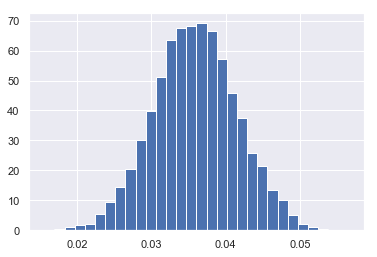

In [301]:
_=plt.hist(replicates_under100 - replicates_over1000, bins=30, density=True)
plt.show()

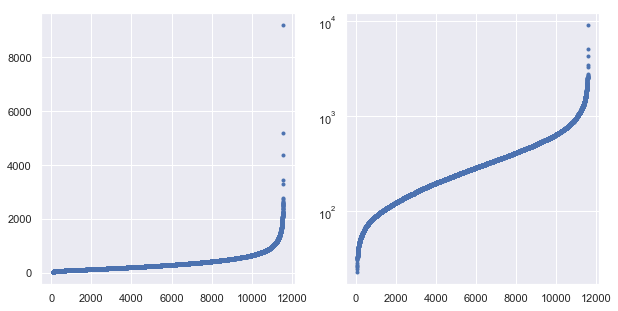

In [330]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(sorted(clean_hospital_read_df.Number_of_Discharges/clean_hospital_read_df.Excess_Readmission_Ratio), marker=".", linestyle="none")
plt.subplot(1,2,2)
plt.yscale("log")
plt.plot(sorted(clean_hospital_read_df.Number_of_Discharges/clean_hospital_read_df.Excess_Readmission_Ratio), marker=".", linestyle="none")